---
1. 
    ### 移動平均法 每個像素點 改用周圍3x3像素矩陣的平均值
    ### 這樣就可以均勻分配影像的灰階變化 使人看不見細小的雜訊
---

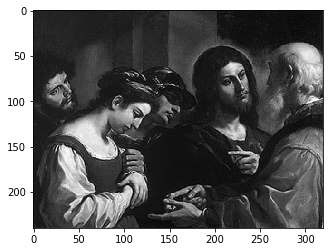

img size:  (240, 320)


In [12]:
#自己中心像素與鄰近的8個像素求出平均值 (kernal size 通常為奇數)
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt 

img = Image.open('smooth.png').convert('L')
plt.imshow(img,cmap='gray')
plt.show()

img = np.asarray(img)
print('img size: ',img.shape)

In [50]:
def smoothly(ori,kernal_size): #kernal size should be odd! 觀察後發現起始點都由對角線向右下延伸
    img = ori.copy()
    width = img.shape[1]
    height = img.shape[0]
    bias = int(kernal_size/2)
    for i in range(bias,height-bias):
        for j in range(bias,width-bias):
            kernal = img[i-bias:i+bias+1,j-bias:j+bias+1]#利用slicing切出kernal
            #print(i,j)
            #print(kernal)
            mean_efficent = np.mean(kernal)
            img[i,j] = mean_efficent
    
    return img


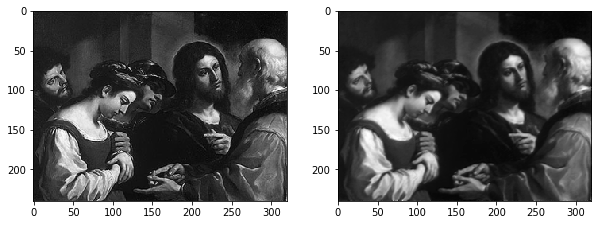

In [51]:
smooth = smoothly(img,3)

fig,(ori,after) = plt.subplots(1,2,figsize=(10,10))
ori.imshow(Image.fromarray(img),cmap = 'gray')
after.imshow(smooth,cmap = 'gray')
plt.show()